In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [13]:
retail_df = pd.read_csv("C:/Users/UltraBook 3.1/Desktop/data_analysis projects/Online_retail/online_retail.csv")

In [14]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
# drop all rows without customerid
retail_df.dropna(axis=0, inplace=True)

In [17]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [18]:
# introduce a new column called Total_amount
retail_df['Total_amount'] = retail_df['Quantity'] * retail_df['Price']

In [19]:
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,14.85


In [20]:
# perform analysis using the RFM method

# monetary

monetary_df = retail_df.groupby('Customer ID')["Total_amount"].sum()
monetary_df = monetary_df.reset_index()
monetary_df.rename(columns={'Total_amount':'Monetary'}, inplace= True)
monetary_df

,Customer ID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [21]:
# get the frequency 

frequency_df = retail_df.groupby('Customer ID')["InvoiceDate"].count()
frequency_df = frequency_df.reset_index()
frequency_df.rename(columns={'InvoiceDate':'Frequency'}, inplace= True)
frequency_df

,Customer ID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [22]:
# get recency 
#  change the datatype of InvoiceDate to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='mixed')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       406830 non-null  object        
 1   StockCode     406830 non-null  object        
 2   Description   406830 non-null  object        
 3   Quantity      406830 non-null  int64         
 4   InvoiceDate   406830 non-null  datetime64[ns]
 5   Price         406830 non-null  float64       
 6   Customer ID   406830 non-null  float64       
 7   Country       406830 non-null  object        
 8   Total_amount  406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [23]:
last_day = retail_df['InvoiceDate'].max()
retail_df['Difference'] = last_day -  retail_df['InvoiceDate']

In [24]:
# get the days
def get_days(x):
    days= str(x).split()[0]
    return int(days)


retail_df['Difference'] = retail_df['Difference'].apply(get_days)

In [25]:
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,89
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,89
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,89
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,14.85,89


In [26]:
retail_df.rename(columns={'Difference': 'Recency'}, inplace= True)


In [27]:
Recency_df = retail_df.groupby('Customer ID')['Recency'].min()
Recency_df.reset_index()

,Customer ID,Recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4367,18280.0,160
4368,18281.0,4
4369,18282.0,93
4370,18283.0,10


In [43]:
# join The dataframes

first_group = pd.merge(monetary_df, frequency_df, on='Customer ID', how='inner')
final_group = pd.merge(first_group, Recency_df, on='Customer ID', how='inner')

In [44]:
final_group

,Customer ID,Monetary,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311
...,...,...,...,...
4367,18280.0,180.60,10,160
4368,18281.0,80.82,7,4
4369,18282.0,176.60,13,93
4370,18283.0,2094.88,756,10


In [45]:
# identify outliers
variable_outliers = ['Monetary', 'Frequency', 'Recency']
for variable in variable_outliers:
    lower_bound = final_group[variable].quantile(0.25)
    upper_bound = final_group[variable].quantile(0.75)
    IQR = upper_bound - lower_bound
    extension = IQR * 1.5
    lower_outliers = lower_bound - extension
    upper_outliers = upper_bound  + extension

    Outliers = final_group[(final_group[variable] < lower_outliers) | (final_group[variable] > upper_outliers)].index
    print(f'{len(Outliers)} outliers were found in {variable} column') 
    final_group.drop(Outliers, inplace=True)


423 outliers were found in Monetary column
252 outliers were found in Frequency column
81 outliers were found in Recency column


In [46]:
# elbow method for cluster size
# initialise the features
scaled_values = final_group[['Recency', 'Frequency', 'Monetary']]

# create an scaler object
standardizer = StandardScaler()

# implement
scaled_values = standardizer.fit_transform(scaled_values)
scaled_values = pd.DataFrame(scaled_values)
scaled_values.columns =['Recency', 'Frequency', 'Monetary']
scaled_values


,Recency,Frequency,Monetary
0,2.331764,-1.082062,-1.055712
1,-0.285606,-0.388764,1.365281
2,-0.882366,0.615324,1.311816
3,2.174722,-0.723460,-0.605254
4,-0.317014,1.141274,1.026051
...,...,...,...
3611,-0.306545,-0.914715,-0.821458
3612,0.593830,-0.890808,-0.812432
3613,-1.039409,-0.962528,-0.946842
3614,-0.107625,-0.819087,-0.817821


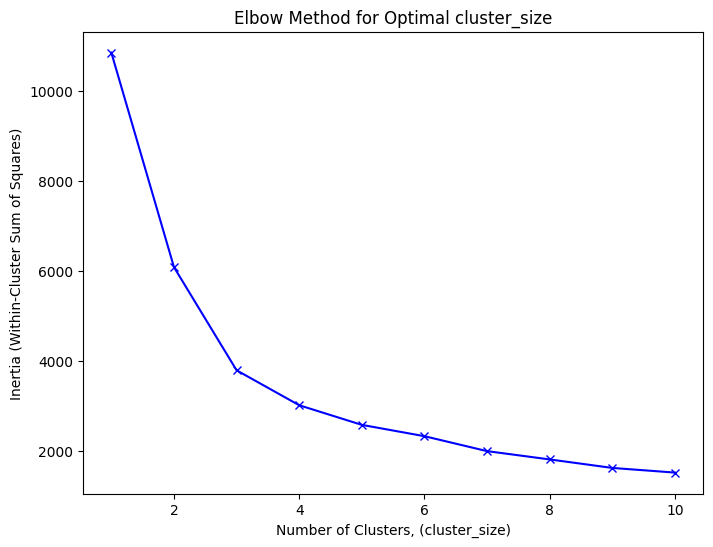

In [47]:
# find the optimal number of clusters to apply
k_range = range(1, 11)

# Empty list to store inertia values
scores_inertia = []

# Iterate over different values of K
for cluster_size in k_range:
    kmeans = KMeans(n_clusters=cluster_size, random_state=42)
    kmeans.fit(scaled_values)
    scores_inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, scores_inertia, 'bx-')
plt.xlabel('Number of Clusters, (cluster_size)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal cluster_size')
# plt.tight_layout()
plt.show()

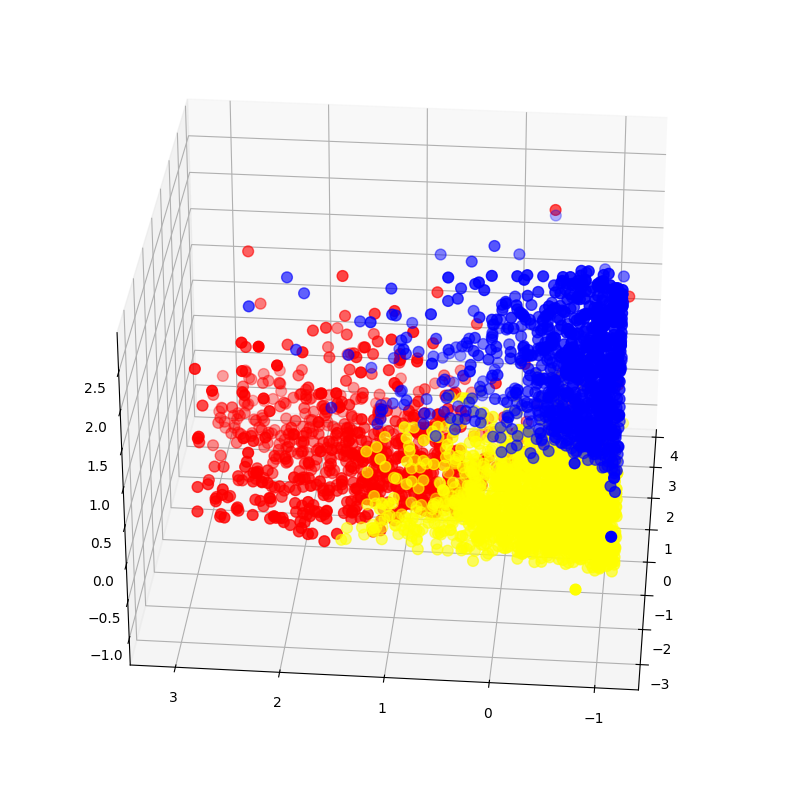

In [48]:
# number of optimum clusters is 4
cluster_size = 3
# Create a KMeans object
kmeans = KMeans(n_clusters=cluster_size) 

# Fit the KMeans model to the data
kmeans.fit(scaled_values)

# Get the cluster labels for each data point
clusters = kmeans.labels_

scaled_values['labels'] = clusters

fig = plt.figure(figsize=(21,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_values['Monetary'][scaled_values.labels == 0],
           scaled_values['Frequency'][scaled_values.labels == 0], 
           scaled_values['Recency'][scaled_values.labels == 0], c='red', s=60)
ax.scatter(scaled_values['Monetary'][scaled_values.labels == 1],
           scaled_values['Frequency'][scaled_values.labels == 1], 
           scaled_values['Recency'][scaled_values.labels == 1], c='yellow', s=60)
ax.scatter(scaled_values['Monetary'][scaled_values.labels == 2],
           scaled_values['Frequency'][scaled_values.labels == 2], 
           scaled_values['Recency'][scaled_values.labels == 2], c='blue', s=60)
ax.view_init(30, 185)
plt.show()

In [49]:
scaled_values

,Recency,Frequency,Monetary,labels
0,2.331764,-1.082062,-1.055712,2
1,-0.285606,-0.388764,1.365281,1
2,-0.882366,0.615324,1.311816,0
3,2.174722,-0.723460,-0.605254,2
4,-0.317014,1.141274,1.026051,0
...,...,...,...,...
3611,-0.306545,-0.914715,-0.821458,1
3612,0.593830,-0.890808,-0.812432,2
3613,-1.039409,-0.962528,-0.946842,1
3614,-0.107625,-0.819087,-0.817821,1


In [64]:
# merge the frequency table to retail_df
# retail_df = pd.merge(retail_df, frequency_df, on ='Customer ID', how='inner')
# retail_df.drop(columns=['Frequency_x','Frequency_y'] , inplace=True)
# new_df = retail_df[['Customer ID',	'Country', 'Total_amount', 'Recency',  'Frequency']]
# new_df.rename(columns ={'Total_amount': 'Monetary'}, inplace=True)
# retail_df
new_df

,Customer ID,Country,Monetary,Recency,Frequency
0,17850.0,United Kingdom,15.30,697,312
1,17850.0,United Kingdom,20.34,697,312
2,17850.0,United Kingdom,22.00,697,312
3,17850.0,United Kingdom,20.34,697,312
4,17850.0,United Kingdom,20.34,697,312
...,...,...,...,...,...
406825,12680.0,France,12.60,89,53
406826,12680.0,France,16.60,89,53
406827,12680.0,France,16.60,89,53
406828,12680.0,France,14.85,89,53


In [68]:
# # cluster customers by country to know the country with the highest amount of purchases/sales

# rfm scoring (1,2,3,4,5) using country to perform analysis
# 
# 2. RFM Scoring (example: simple quartile-based scoring)
# new_df['R_score'] = pd.qcut(new_df['Recency'], q=5, labels=[5, 4, 3, 2, 1]) 
# new_df['F_score'] = pd.qcut(new_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
# new_df['M_score'] = pd.qcut(new_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# # Calculate RFM Score (sum of individual scores)
# new_df[['R_score', 'F_score', 'M_score']] = new_df[['R_score', 'F_score', 'M_score']].astype(int)
# new_df['RFM_Score'] = new_df['R_score'] + new_df['F_score'] + new_df['M_score']
new_df = pd.DataFrame(new_df)
new_df

,Customer ID,Country,Monetary,Recency,Frequency,R_score,F_score,M_score,RFM_Score
0,17850.0,United Kingdom,15.30,697,312,1,4,4,9
1,17850.0,United Kingdom,20.34,697,312,1,4,4,9
2,17850.0,United Kingdom,22.00,697,312,1,4,5,10
3,17850.0,United Kingdom,20.34,697,312,1,4,4,9
4,17850.0,United Kingdom,20.34,697,312,1,4,4,9
...,...,...,...,...,...,...,...,...,...
406825,12680.0,France,12.60,89,53,4,1,3,8
406826,12680.0,France,16.60,89,53,4,1,4,9
406827,12680.0,France,16.60,89,53,4,1,4,9
406828,12680.0,France,14.85,89,53,4,1,3,8


In [ ]:
country_number = new_df['Country'].nunique()
country_number

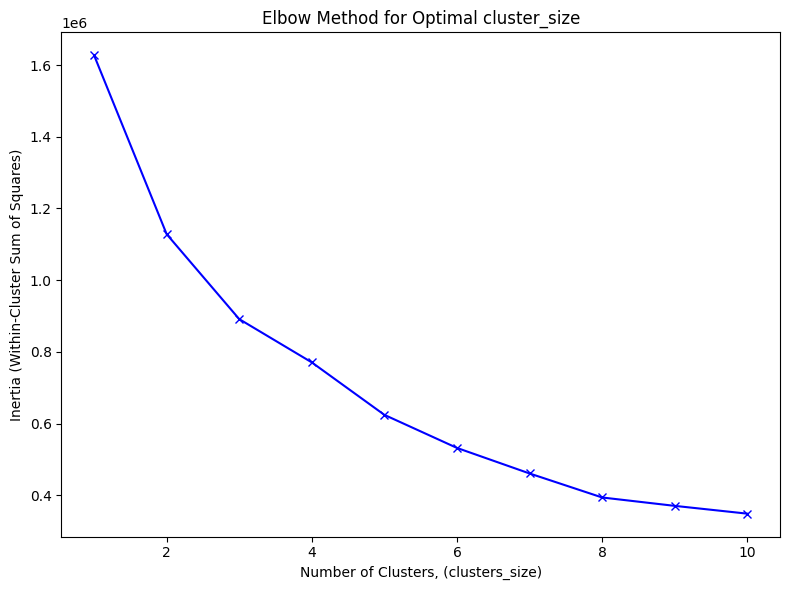

In [69]:
# elbow method for cluster size
# initialise the features
scale_features = new_df[['R_score', 'F_score', 'M_score', 'RFM_Score']]

# create an scaler object
standardizer = StandardScaler()

# implement
scale_values = standardizer.fit_transform(scale_features)
scale_values = pd.DataFrame(scale_values)
scale_values.columns =['R_score', 'F_score', 'M_score', 'RFM_Score']
scale_values

k_ranges = range(1, 11)

# # Empty list to store inertia values
score_inertia = []

# # Iterate over different values of K
for clusters_size in k_ranges:
    kmeans = KMeans(n_clusters=clusters_size, random_state=42)
    kmeans.fit(scale_values)
    score_inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_ranges, score_inertia, 'bx-')
plt.xlabel('Number of Clusters, (clusters_size)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal cluster_size')
plt.tight_layout()
plt.show()

C:\Users\UltraBook 3.1\AppData\Local\Temp\ipykernel_13956\4109133532.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)
C:\Users\UltraBook 3.1\AppData\Local\Temp\ipykernel_13956\4109133532.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['R_score'], cluster_data['F_score'], cluster_data['M_score'],
C:\Users\UltraBook 3.1\AppData\Local\Temp\ipykernel_13956\4109133532.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3

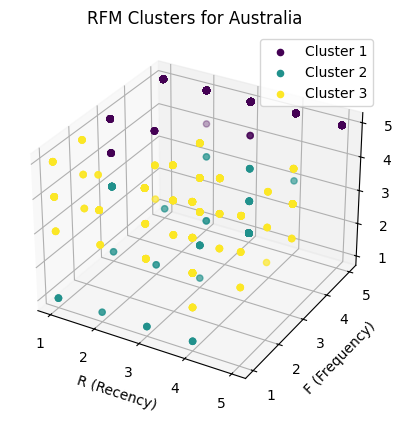

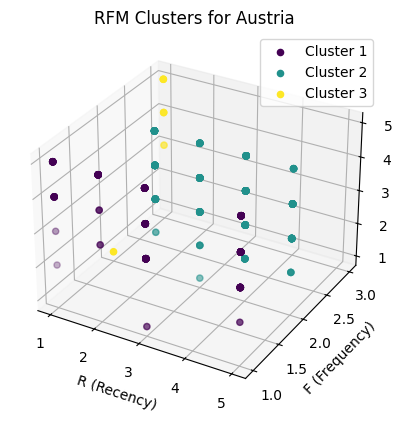

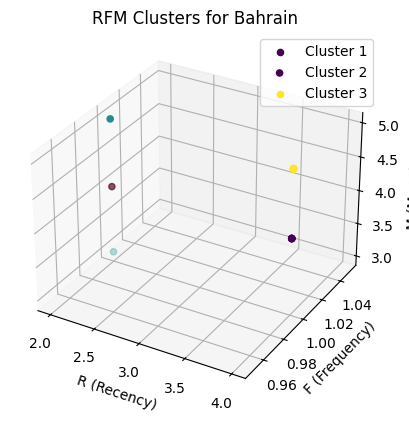

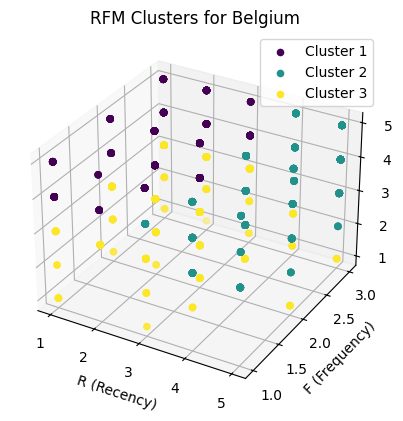

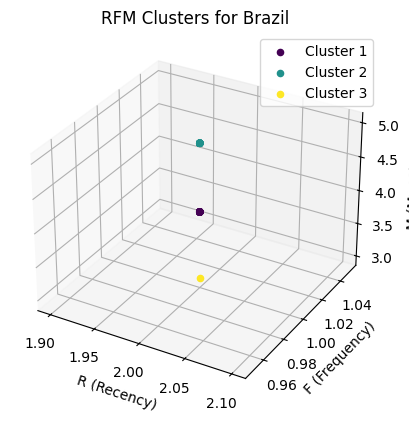

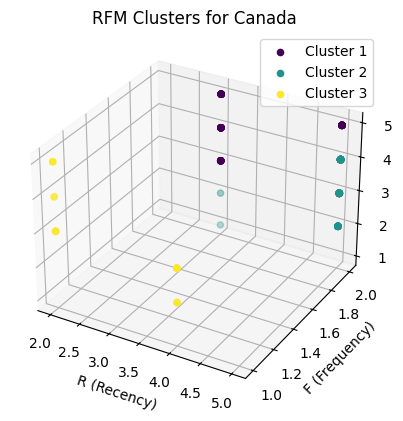

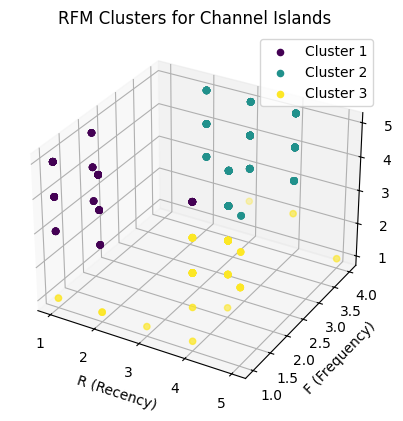

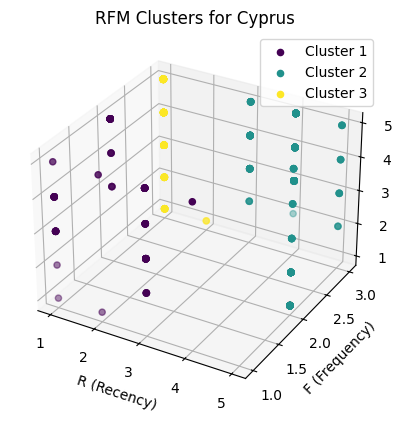

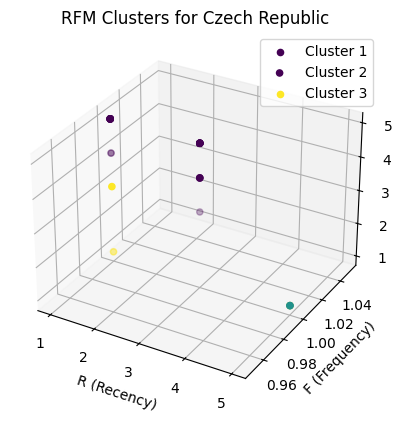

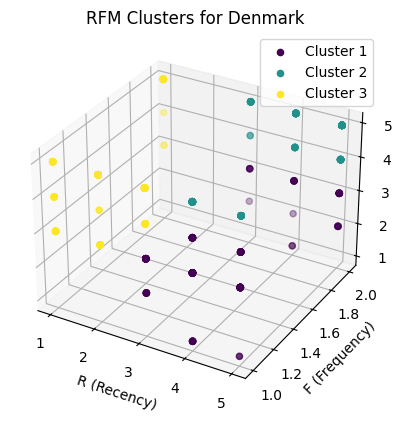

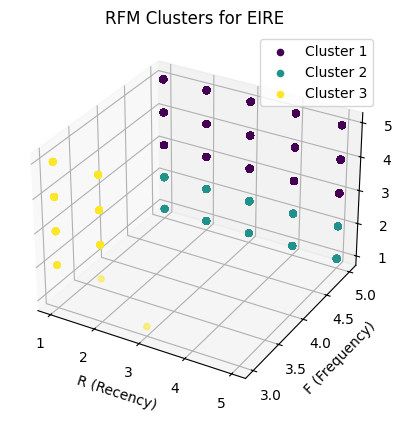

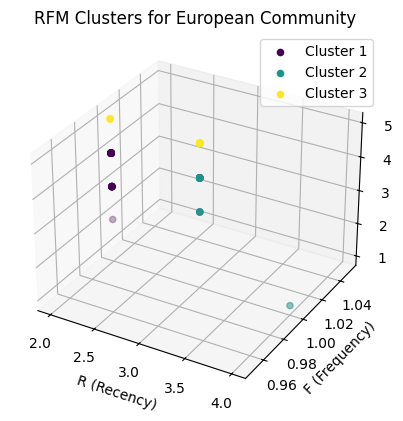

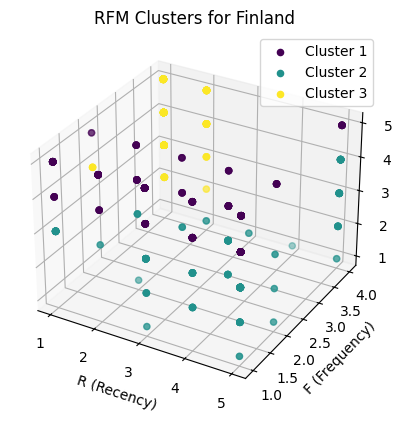

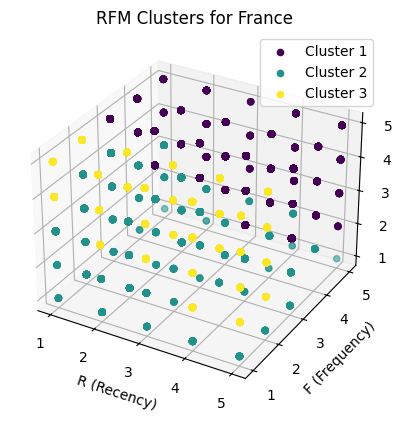

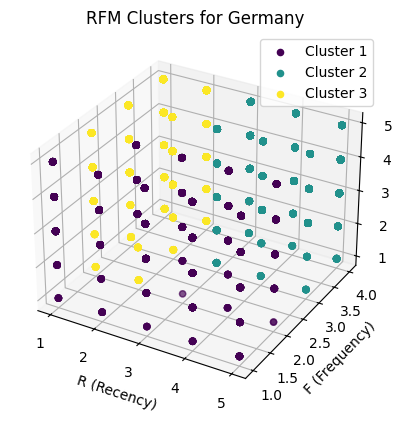

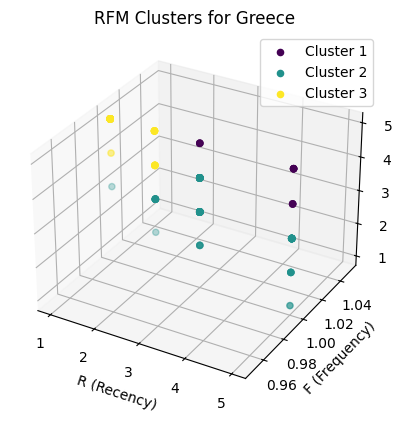

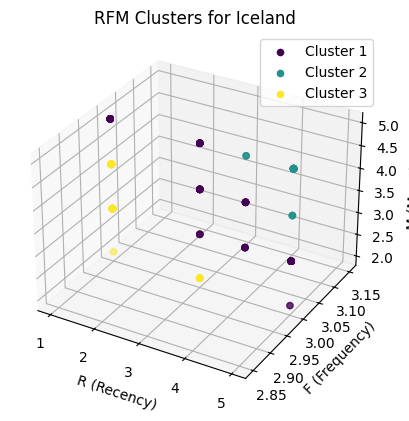

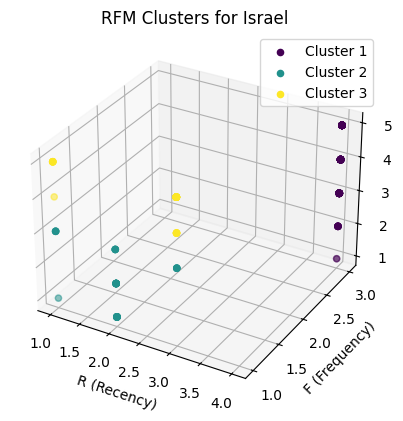

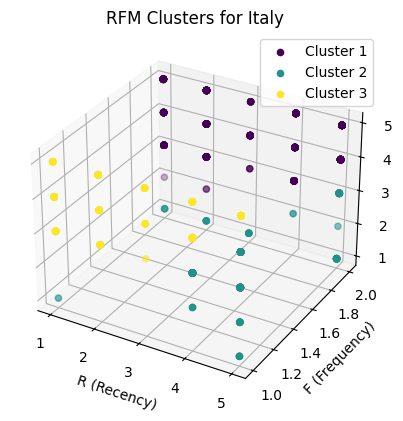

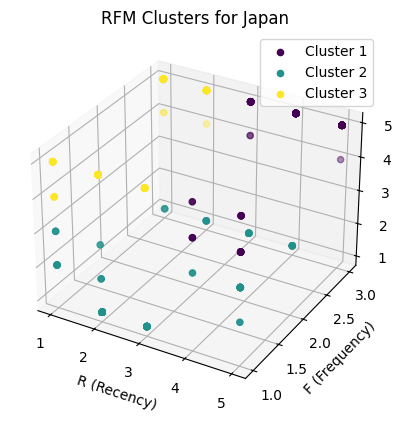

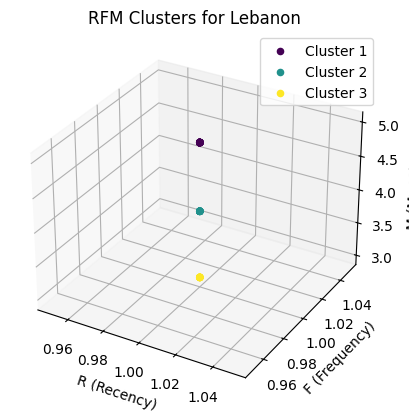

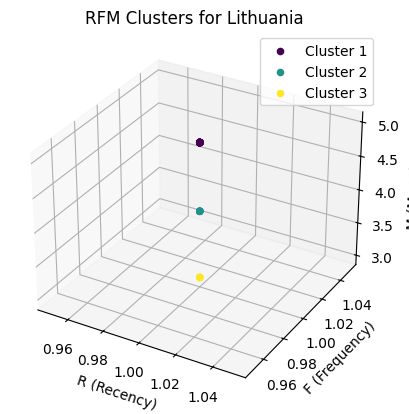

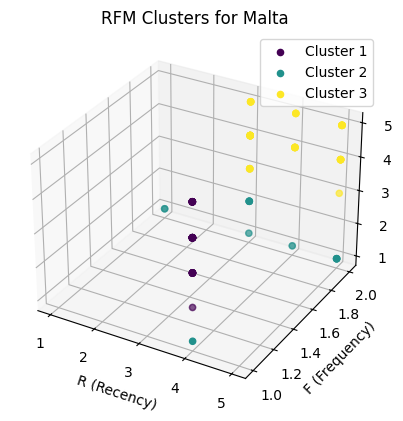

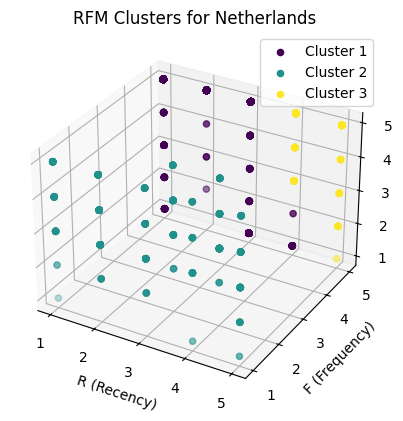

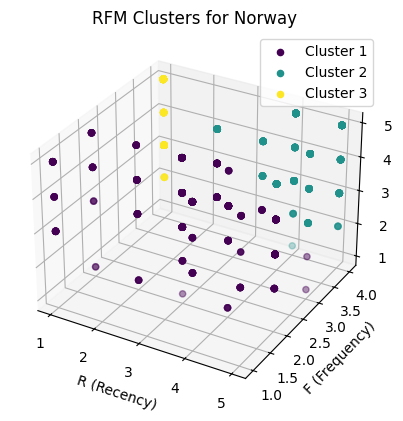

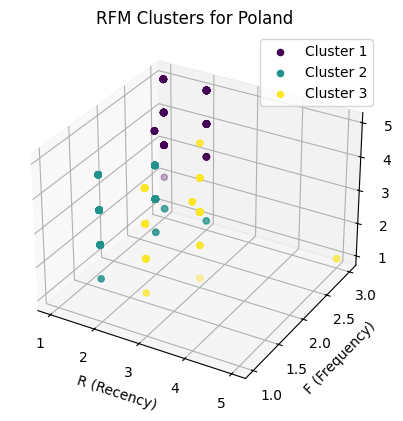

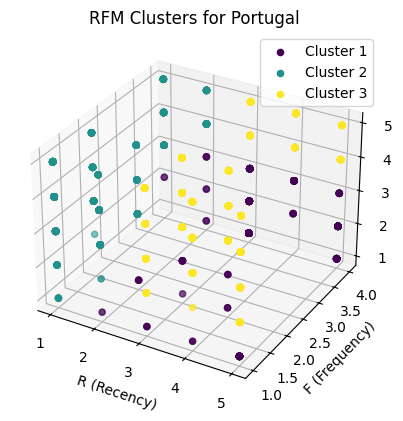

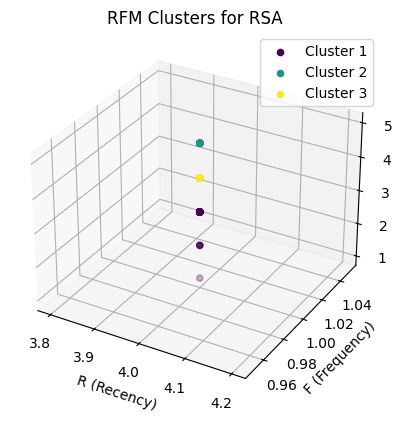

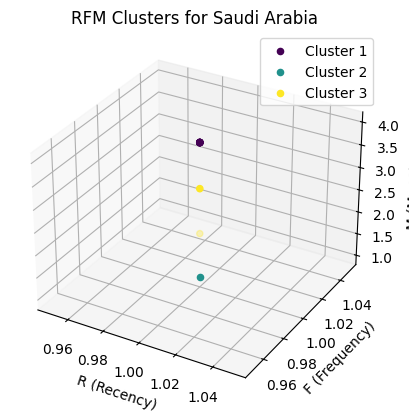

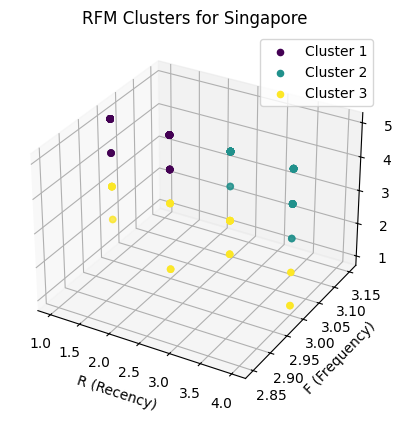

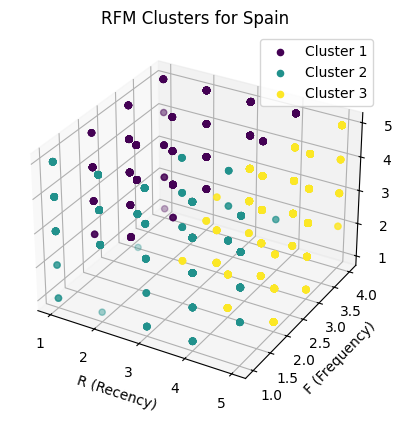

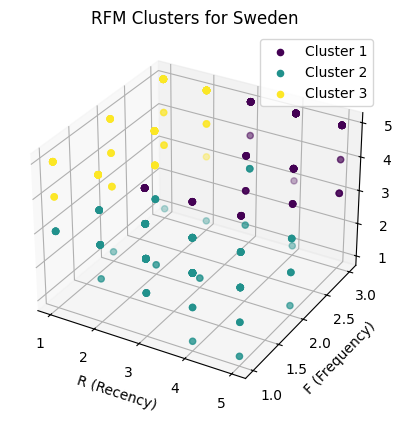

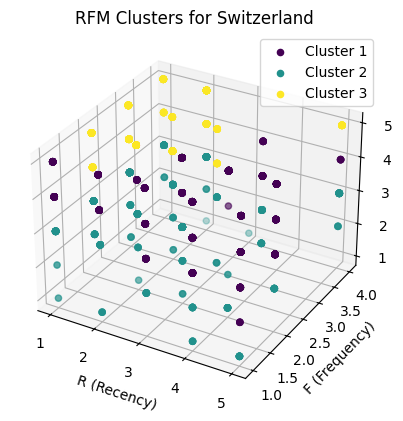

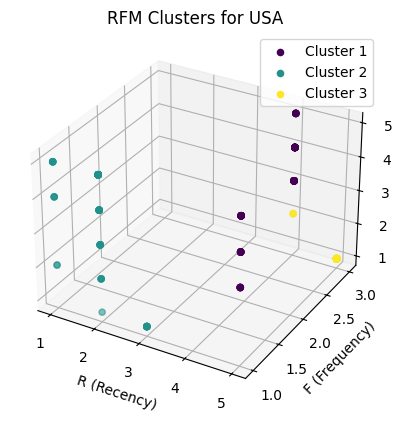

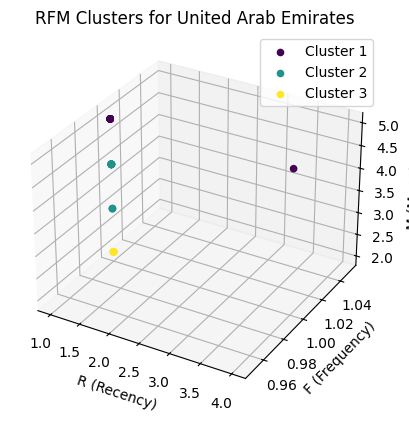

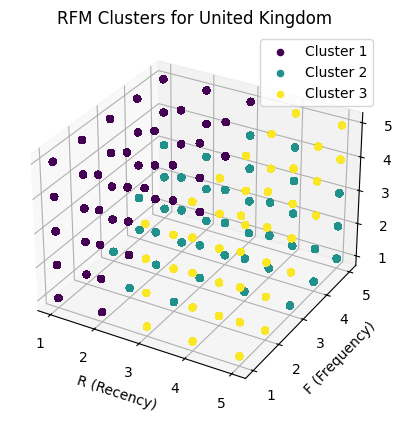

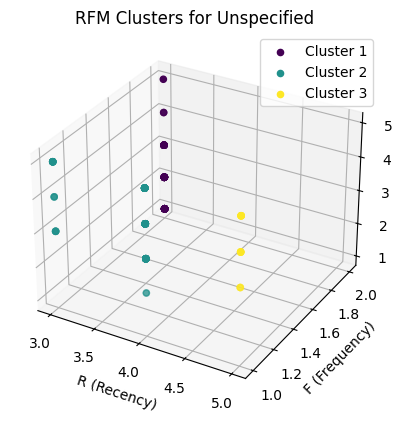

In [76]:
# from  elbow method i would use 3 clusters
subplots = []
country_group_list = []
country_name = []
for country, country_df in new_df.groupby('Country'):
    # Standardize RFM scores for each country
    scaler = StandardScaler()
    scaled_rfm = scaler.fit_transform(country_df[['R_score', 'F_score', 'M_score']])
    n_clusters = 3
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_rfm)

    # Assign cluster labels to each customer within the country
    country_df['Cluster'] = kmeans.labels_

    # Print cluster assignments for the country
    # print(f"\nCluster Assignments for {country}:")
    feat = country_df[['Customer ID', 'R_score', 'F_score', 'M_score', 'Cluster']]
    # print(feat)
    country_group_list.append(feat)
    country_name.append(country)

# Create a new figure for each country
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a colormap
    colors = plt.cm.get_cmap('viridis', n_clusters)

    # Plot the data with color-coded clusters
    for i in range(n_clusters):
        cluster_data = country_df[country_df['Cluster'] == i]
        ax.scatter(cluster_data['R_score'], cluster_data['F_score'], cluster_data['M_score'], 
                   c=colors(i), label=f'Cluster {i+1}')

    # Set plot labels and title
    ax.set_xlabel('R (Recency)')
    ax.set_ylabel('F (Frequency)')
    ax.set_zlabel('M (Monetary)')
    ax.set_title(f'RFM Clusters for {country}')
    ax.legend()

    # Append the figure to the list
    subplots.append(fig)

# Show the plots (you can adjust display options as needed)
plt.show()
    


In [77]:
result = country_group_list
counts = [] 
for i in result:
    values = i.count()
    counts.append(values)
    


In [98]:
counts[28]
# [29:]
# 35,14, 13, 10
# united kingdom close 362,000 purchases
# EIRE close 8,000 purchases
# Germany close to 10,000 purchases
# france close t0 9000 purchases
# Spain close to 3,000 purchases
# belgium close to 2100 purchases
 # Bahrain 17 sales, brazil 32 sales, Czech 30 sales, Saudi arabia 10 sales.

Customer ID    10
R_score        10
F_score        10
M_score        10
Cluster        10
dtype: int64

In [99]:
country_name[28]

'Saudi Arabia'